In [ ]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Copy of COVID-19 di Indonesia @kawalcovid19.xlsx - Timeline.csv', header=0,encoding='utf-8')

df.describe()

,Total Kasus,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,Unnamed: 36
count,3642,3046,3443,3375,3075,3046,3410,3601,2900,3518,3496,3607,2973,3424,3220,3416,3009,3134,3252,3446,3351,3238,3454,3110,3404,3110,3226,3345,2839,2931,3062,2944,2948,2922,2929,857,2
unique,371,1314,1697,1620,1281,1075,1676,2406,1184,2189,2201,2192,1156,1819,1417,1650,1190,1312,1343,1602,1611,1358,1665,1148,1667,1300,1419,1709,883,995,1105,1092,973,1307,977,9,2
top,5-May,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,0,"1,786,187"
freq,13,287,288,288,287,287,288,288,287,288,287,288,287,288,288,287,286,288,287,287,287,287,287,287,287,287,287,288,287,287,287,287,287,287,286,552,1


In [ ]:
 df[["Total Kasus","Jatim","Jabar","Jateng","Bali"]]

,Total Kasus,Jatim,Jabar,Jateng,Bali
0,1 Jan,"85,039","85,083","82,613","17,694"
1,2 Jan,"85,762","86,250","83,584","17,859"
2,3 Jan,"86,361","87,482","84,512","17,978"
3,4 Jan,"87,070","88,561","85,549","18,096"
4,5 Jan,"87,797","89,661","86,545","18,263"
...,...,...,...,...,...
3643,26 Sep,8,6,3,4
3644,27 Sep,14,6,12,7
3645,28 Sep,12,6,20,6
3646,29 Sep,9,5,12,7


In [113]:
df1 = df.rename({'Total Kasus': 'Tanggal'}, axis=1) 
df1[["Tanggal","Jatim","Jabar","Jateng","Bali"]].iloc[125:139:2]

,Tanggal,Jatim,Jabar,Jateng,Bali
125,6-May,149214,286868,186409,45428
127,8-May,149671,291030,187073,45655
129,10-May,150107,292592,188065,45832
131,12-May,150612,294779,188714,46030
133,14-May,150901,295789,189356,46171
135,16-May,151248,297304,189950,46290
137,18-May,151677,299784,191184,46443


In [114]:
df1['Jatim'] = pd.to_numeric(df1['Jatim'], errors='coerce').fillna(0).astype(int)
df1['Jabar'] = pd.to_numeric(df1['Jabar'], errors='coerce').fillna(0).astype(int)
df1['Jateng'] = pd.to_numeric(df1['Jateng'], errors='coerce').fillna(0).astype(int)
df1['Bali'] = pd.to_numeric(df1['Bali'], errors='coerce').fillna(0).astype(int)

df1[["Tanggal","Jatim","Jabar","Jateng","Bali"]].iloc[125:139:2].set_index('Tanggal').diff()

,Jatim,Jabar,Jateng,Bali
Tanggal,,,,
6-May,NaN,NaN,NaN,NaN
8-May,457.0,4162.0,664.0,227.0
10-May,436.0,1562.0,992.0,177.0
12-May,505.0,2187.0,649.0,198.0
14-May,289.0,1010.0,642.0,141.0
16-May,347.0,1515.0,594.0,119.0
18-May,429.0,2480.0,1234.0,153.0


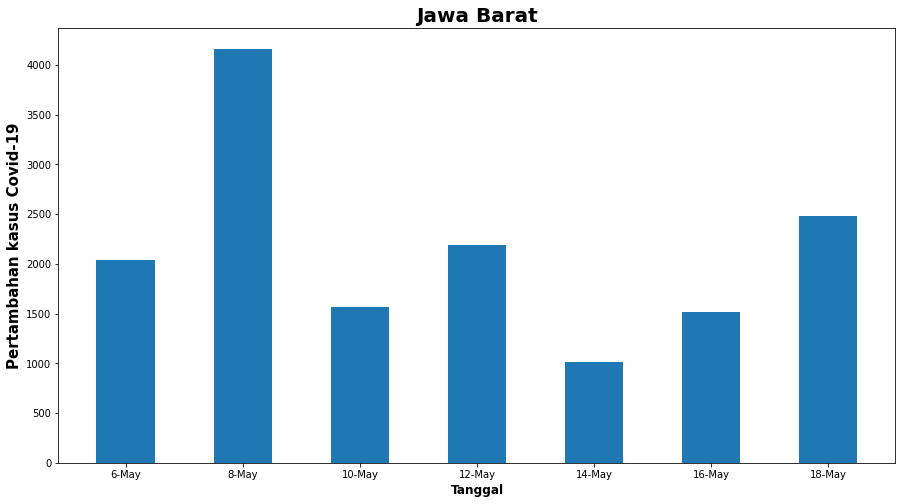

In [143]:
fig = plt.figure(figsize = (15, 8))
jatim = plt.bar(df1["Tanggal"].iloc[123:139:2], df1['Jabar'].iloc[123:139:2].diff(periods=1), width = 0.5)
plt.xlabel("Tanggal", fontweight ='bold', fontsize = 12)
plt.ylabel("Pertambahan kasus Covid-19", fontweight ='bold', fontsize = 15)
plt.title("Jawa Barat", fontweight ='bold', fontsize = 20)
plt.show()

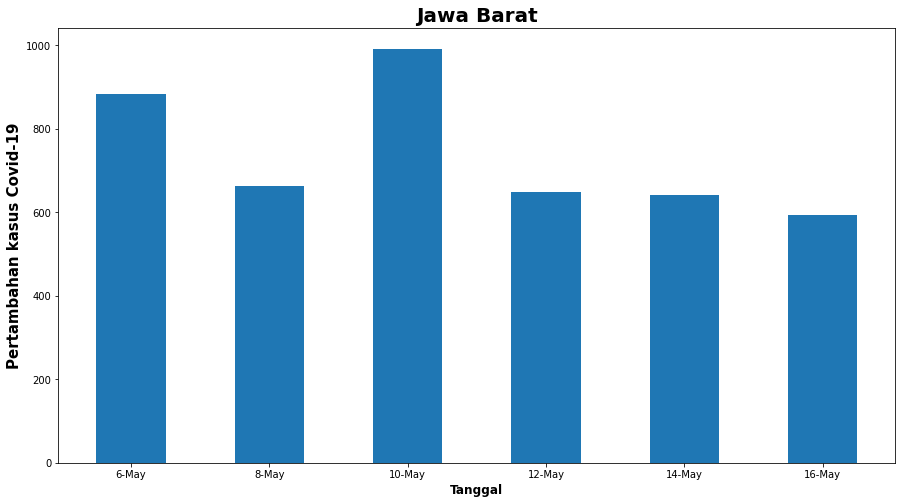

In [144]:
fig = plt.figure(figsize = (15, 8))
jatim = plt.bar(df1["Tanggal"].iloc[123:137:2], df1['Jateng'].iloc[123:137:2].diff(periods=1), width = 0.5)
plt.xlabel("Tanggal", fontweight ='bold', fontsize = 12)
plt.ylabel("Pertambahan kasus Covid-19", fontweight ='bold', fontsize = 15)
plt.title("Jawa Barat", fontweight ='bold', fontsize = 20)
plt.show()

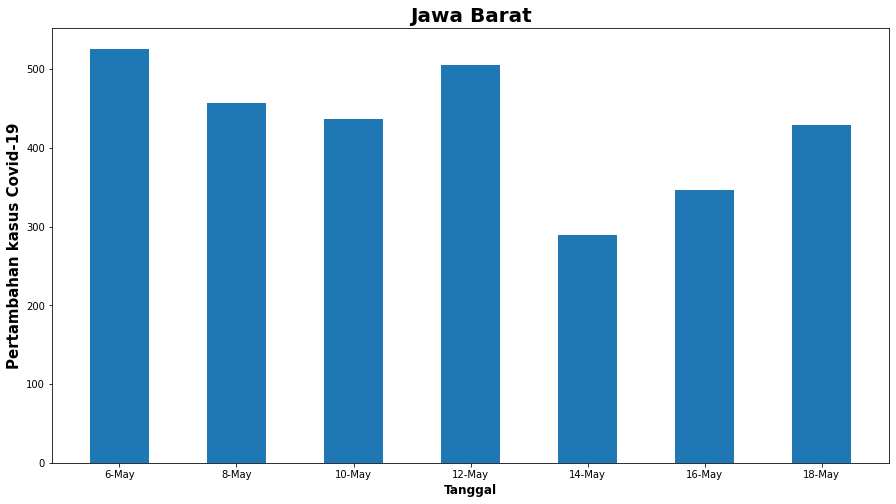

In [145]:
fig = plt.figure(figsize = (15, 8))
jatim = plt.bar(df1["Tanggal"].iloc[123:139:2], df1['Jatim'].iloc[123:139:2].diff(periods=1), width = 0.5)
plt.xlabel("Tanggal", fontweight ='bold', fontsize = 12)
plt.ylabel("Pertambahan kasus Covid-19", fontweight ='bold', fontsize = 15)
plt.title("Jawa Barat", fontweight ='bold', fontsize = 20)
plt.show()

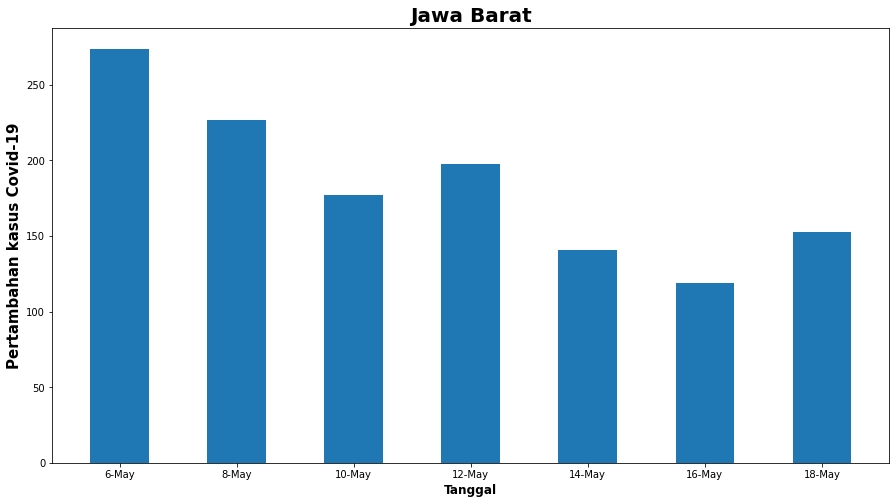

In [146]:
fig = plt.figure(figsize = (15, 8))
jatim = plt.bar(df1["Tanggal"].iloc[123:139:2], df1['Bali'].iloc[123:139:2].diff(periods=1), width = 0.5)
plt.xlabel("Tanggal", fontweight ='bold', fontsize = 12)
plt.ylabel("Pertambahan kasus Covid-19", fontweight ='bold', fontsize = 15)
plt.title("Jawa Barat", fontweight ='bold', fontsize = 20)
plt.show()

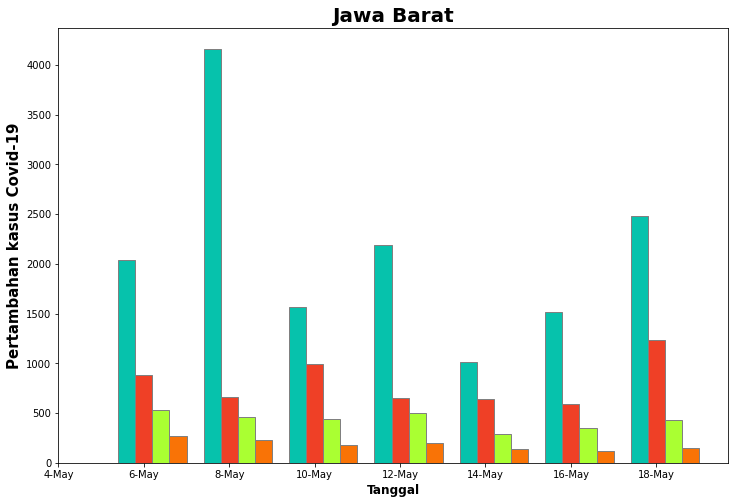

In [142]:
fig = plt.subplots(figsize =(12, 8))

barWidth = 0.20
br1 = np.arange(len(df1['Jabar'].iloc[123:139:2].diff(periods=1)))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, df1['Jabar'].iloc[123:139:2].diff(periods=1), color ='#06C2AC', width = barWidth,
        edgecolor ='grey', label ='Jawa Barat')
plt.bar(br2, df1['Jateng'].iloc[123:139:2].diff(periods=1), color ='#EF4026', width = barWidth,
        edgecolor ='grey', label ='Jawa Tengah')
plt.bar(br3, df1['Jatim'].iloc[123:139:2].diff(periods=1), color ='#AAFF32', width = barWidth,
        edgecolor ='grey', label ='Jawa Timur')
plt.bar(br4, df1['Bali'].iloc[123:139:2].diff(periods=1), color ='#F97306', width = barWidth,
        edgecolor ='grey', label ='Bali')



plt.xlabel("Tanggal", fontweight ='bold', fontsize = 12)
plt.ylabel("Pertambahan kasus Covid-19", fontweight ='bold', fontsize = 15)
plt.title("Jawa Barat", fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth for r in range(len(df1['Jabar'].iloc[123:139:2].diff(periods=1)))],
        df1["Tanggal"].iloc[123:139:2])
plt.show()